<a href="https://colab.research.google.com/github/c7r7/DECISION-TREE/blob/main/Bank_churn_dataset(NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [29]:
train_df=pd.read_csv('/content/train.csv')

In [56]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [57]:
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

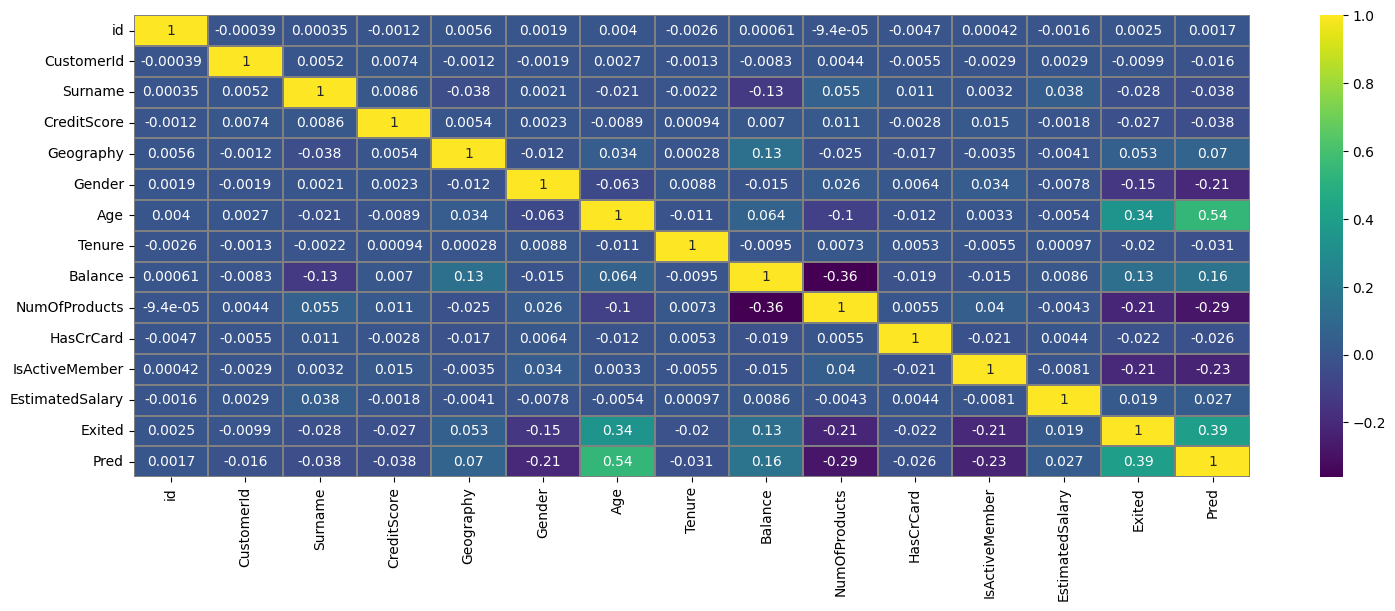

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df=train_df.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(corr_df, cmap='viridis', linecolor='grey', linewidths=0.2, annot=True)
plt.show()

In [58]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
train_df['Gender']=le.fit_transform(train_df['Gender'])
train_df['Surname']=le.fit_transform(train_df['Surname'])
train_df['Geography']=le.fit_transform(train_df['Geography'])
train_df


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [9]:
len(train_df)

56430

In [12]:
train_df.shape

(56430, 14)

In [60]:
train_x=train_df.iloc[:,0:13]
train_y=train_df.iloc[:,13]

In [61]:
train_x

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75
165030,165030,15665521,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45
165031,165031,15664752,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56
165032,165032,15689614,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03


In [62]:
train_y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [63]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.00000000e+00 4.36943226e-01 6.88125894e-01 ... 1.00000000e+00
  0.00000000e+00 9.07278595e-01]
 [6.05939418e-06 7.33936293e-01 6.88483548e-01 ... 1.00000000e+00
  1.00000000e+00 2.47483235e-01]
 [1.21187884e-05 5.15258671e-01 4.21316166e-01 ... 1.00000000e+00
  0.00000000e+00 9.24363827e-01]
 ...
 [9.99987881e-01 3.96221434e-01 4.19170243e-01 ... 1.00000000e+00
  1.00000000e+00 6.37150748e-01]
 [9.99993941e-01 4.95673810e-01 4.20600858e-01 ... 0.00000000e+00
  1.00000000e+00 3.55841233e-01]
 [1.00000000e+00 6.68417410e-01 9.17024320e-01 ... 1.00000000e+00
  0.00000000e+00 3.07880453e-01]]


In [67]:
train_y.shape


(165034,)

***TEST_DF***

In [70]:
test_df=pd.read_csv('/content/test.csv')


In [71]:
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [72]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
test_df['Gender']=le.fit_transform(test_df['Gender'])
test_df['Surname']=le.fit_transform(test_df['Surname'])
test_df['Geography']=le.fit_transform(test_df['Geography'])
test_df


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [73]:
test_x=test_df.iloc[:,0:13]

In [74]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
test_x = ms.fit_transform(test_x)
print(test_x)

[[0.00000000e+00 8.32824644e-01 5.47469523e-01 ... 0.00000000e+00
  1.00000000e+00 8.04902718e-01]
 [9.08909127e-06 8.66906144e-01 6.69375693e-01 ... 1.00000000e+00
  0.00000000e+00 3.62723090e-01]
 [1.81781825e-05 9.65718492e-01 4.60288142e-01 ... 1.00000000e+00
  0.00000000e+00 6.94418867e-01]
 ...
 [9.99981822e-01 6.51048646e-01 1.51459180e-01 ... 1.00000000e+00
  0.00000000e+00 8.13867724e-02]
 [9.99990911e-01 4.87381445e-01 9.81159956e-01 ... 1.00000000e+00
  1.00000000e+00 7.94100837e-01]
 [1.00000000e+00 3.92981291e-01 9.07646842e-01 ... 1.00000000e+00
  0.00000000e+00 1.21006456e-01]]


In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(256, input_shape=(13,), activation='relu'),
    Dropout(0.5),
    Dense(128, input_shape=(13,), activation='relu'),
    Dense(64, input_shape=(13,), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
4126/4126 [==============================] - 12s 3ms/step - loss: 0.3833 - accuracy: 0.8378 - val_loss: 0.3412 - val_accuracy: 0.8548
Epoch 2/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3498 - accuracy: 0.8543 - val_loss: 0.3347 - val_accuracy: 0.8583
Epoch 3/20
4126/4126 [==============================] - 12s 3ms/step - loss: 0.3446 - accuracy: 0.8563 - val_loss: 0.3349 - val_accuracy: 0.8592
Epoch 4/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3417 - accuracy: 0.8577 - val_loss: 0.3312 - val_accuracy: 0.8590
Epoch 5/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3391 - accuracy: 0.8585 - val_loss: 0.3325 - val_accuracy: 0.8604
Epoch 6/20
4126/4126 [==============================] - 10s 2ms/step - loss: 0.3379 - accuracy: 0.8590 - val_loss: 0.3290 - val_accuracy: 0.8615
Epoch 7/20
4126/4126 [==============================] - 11s 3ms/step - loss: 0.3364 - accuracy: 0.8585 - val_loss: 0.3305 - val_ac

In [110]:
train_accuracy

0.8647975325584412

In [109]:
# Evaluate on the training dataset
train_loss, train_accuracy = model.evaluate(train_x, train_y)
print(f"Training Accuracy: {train_accuracy}")

# # Evaluate on the test dataset
# test_loss, test_accuracy = model.evaluate(test_x, test_y)
# print(f"Test Accuracy: {test_accuracy}")


5158/5158 [==============================] - 8s 2ms/step - loss: 0.3225 - accuracy: 0.8648
Training Accuracy: 0.8647975325584412


In [87]:
predictions = model.predict(test_x)
predictions

3439/3439 [==============================] - 5s 1ms/step


array([[0.01921807],
       [0.8108952 ],
       [0.05244219],
       ...,
       [0.03811685],
       [0.21779248],
       [0.27939913]], dtype=float32)

In [96]:
predictions.flatten()

array([0.01921807, 0.8108952 , 0.05244219, ..., 0.03811685, 0.21779248,
       0.27939913], dtype=float32)

In [99]:
submission1 = {
    'id':test_df['id'],
    'Exited':predictions.flatten(),
}

In [98]:
submission1

{'id': 0         165034
 1         165035
 2         165036
 3         165037
 4         165038
            ...  
 110018    275052
 110019    275053
 110020    275054
 110021    275055
 110022    275056
 Name: id, Length: 110023, dtype: int64,
 'Exited': array([[0.01921807],
        [0.8108952 ],
        [0.05244219],
        ...,
        [0.03811685],
        [0.21779248],
        [0.27939913]], dtype=float32)}

In [101]:
submission=pd.DataFrame(submission1)
submission

,id,Exited
0,165034,0.019218
1,165035,0.810895
2,165036,0.052442
3,165037,0.300608
4,165038,0.370461
...,...,...
110018,275052,0.092593
110019,275053,0.098024
110020,275054,0.038117
110021,275055,0.217792
